<a href="https://colab.research.google.com/github/Woongstar/AItrack/blob/main/%EB%B0%94%EC%9A%B8%EB%9E%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ALT enter 아래라인생성하고 실행
#ctrl enter 라인생성 안하고 실행
x=3
y=7
x+y

10

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# matplotlib 와 seaborn 은 그래프관련
#pandas 는 c를 기반으로 데이터 분석
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
sex_mean = train.groupby('Sex')['Age'].mean()

train.loc[(train["Sex"] =='female') & (train["Age"].isnull()), "Age"] = int(sex_mean[0])
train.loc[(train["Sex"] =='male') & (train["Age"].isnull()), "Age"] = int(sex_mean[1])

train['Age'] = train['Age'].apply(lambda x:round(x))
train.head(40)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.575758,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.016827,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
C95            1
C32            1
B38            1
E49            1
B78            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [ ]:
train['Cabin'] = train['Cabin'].fillna('N')
train['Cabin'] = train['Cabin'].apply(lambda x:x[0])

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S


In [ ]:
train["Survived_label"] = train["Survived"].replace(0, "Dead").replace(1, "Survived")
train[['Survived','Survived_label']].head()


,Survived,Survived_label
PassengerId,,
1,0,Dead
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Dead


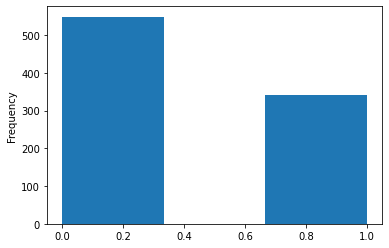

In [ ]:
train["Survived"].plot(kind='hist', bins=3)

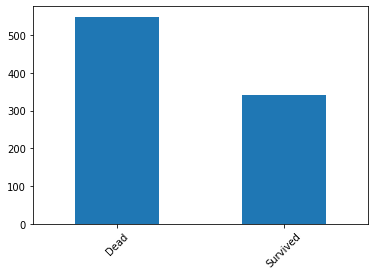

In [ ]:
train["Survived_label"].value_counts().plot(kind='bar', rot='45')

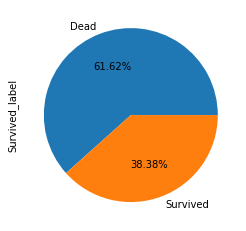

In [ ]:
train["Survived_label"].value_counts().plot(kind='pie', autopct='%1.2f%%')

SyntaxError: ignored

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
wholedata = [train, test]

In [ ]:
train["Age"].fillna(28,inplace=True)
test["Age"].fillna(28, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
for 데이터 in wholedata:
  데이터.Ioc[데이터['Age'] <= 16, 'Age'] = 0
  데이터.Ioc[(데이터['Age'] > 16)&(데이터['Age'] <= 26), 'Age'] = 1
  데이터.Ioc[(데이터['Age'] > 26)&(데이터['Age'] <= 36), 'Age'] = 1
  데이터.Ioc[(데이터['Age'] > 36)&(데이터['Age'] <= 62), 'Age'] = 1
  데이터.Ioc[데이터['Age'] > 62, 'Age'] = 4

AttributeError: ignored

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"]+test["Parch"]+1

In [ ]:
mapping_data = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9: 3.2, 10:3.6, 11:4}
for 데이터 in wholedata:
  데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [ ]:
train['Sex'] = train['Sex'].astype('category').cat.codes

In [ ]:
train.drop('Name', axis = 1, inplace=True)
test.drop('Name', axis = 1, inplace=True)

In [ ]:
train.drop('SibSp', axis = 1, inplace=True)
test.drop('SibSp', axis = 1, inplace=True)

In [ ]:
train.drop('Parch', axis = 1, inplace=True)
test.drop('Parch', axis = 1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,1,22.0,A/5 21171,7.2500,NaN,S,0.4
1,2,1,1,0,38.0,PC 17599,71.2833,C85,C,0.4
2,3,1,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,0,35.0,113803,53.1000,C123,S,0.4
4,5,0,3,1,35.0,373450,8.0500,NaN,S,0.0


In [ ]:
train.drop('PassengerId', axis = 1, inplace=True)
test.drop('PassengerId', axis = 1, inplace=True)

In [ ]:
train.drop('Ticket', axis = 1, inplace=True)
test.drop('Ticket', axis = 1, inplace=True)

KeyError: ignored